Okun's Law
-  X-value = GDP Growth Rate
- GDP Growth Rate = (This Year GDP / Last Years GDP) - 1
- Y-value = Change in Unemployment
- Change in Unemployment = Unemployment This Year - Unemployment Last Year

Demographic Transition Theory
- The slope is positive showing that as the GDP per Capita grows the Population growth grows as well
- This means the consumer market is growing
- But this also means competition will grow


Wage-Spiral Theory
- Relationship between Wage and Inflation
- 

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels

In [15]:
data_GDP = pd.read_csv('GDP growth (annual %).csv')
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")
df_populationGrowth = pd.read_csv('Population growth (annual %).csv')
df_GDPperCapita = pd.read_csv('GDP per capita (current US$).csv')
df_inflation = pd.read_csv('Inflation, consumer prices (annual %).csv')
#df_wages = pd.read_csv('Wages_per_Country.csv')
#df_wages = df_wages.T


def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df


In [16]:
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [17]:
# Unemployment Dataset
df_unemployed = getImportantContries(df_unemployed)
df_unemployed.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_unemployed_long_cut = dataframe_column_cutter(df_unemployed,-33,-1)
df_unemployed_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = df_unemployed_long_cut.T

In [18]:
Canada_Values = df_unemployed.loc[df_unemployed['Country Name'] == 'Canada', '1999':'2021'].values.tolist()[0]
print(Canada_Values)

China_Values = df_unemployed.loc[df_unemployed['Country Name'] == 'China', '1999':'2021'].values.tolist()[0]
print(China_Values)

France_Values = df_unemployed.loc[df_unemployed['Country Name'] == 'France', '1999':'2021'].values.tolist()[0]
print(France_Values)

UnitedStates_Values = df_unemployed.loc[df_unemployed['Country Name'] == 'United States', '1999':'2021'].values.tolist()[0]
print(UnitedStates_Values)

[7.57999992, 6.82999992, 7.21999979, 7.65999985, 7.57000017, 7.19000006, 6.76000023, 6.32000017, 6.03999996, 6.13999987, 8.34000015, 8.06000042, 7.51000023, 7.28999996, 7.07000017, 6.90999985, 6.90999985, 7.0, 6.34000015, 5.82999992, 5.65999985, 9.46000004, 7.51000023]
[3.25, 3.25999999, 3.79999995, 4.23999977, 4.57999992, 4.48999977, 4.51999998, 4.42999983, 4.3499999, 4.59000015, 4.71999979, 4.53000021, 4.55000019, 4.57000017, 4.59000015, 4.61000013, 4.63000011, 4.53000021, 4.44000006, 4.28000021, 4.51999998, 5.0, 4.81699991]
[11.9799995, 10.2200003, 8.60999966, 8.69999981, 8.31000042, 8.90999985, 8.48999977, 8.44999981, 7.65999985, 7.05999994, 8.73999977, 8.86999989, 8.81000042, 9.39999962, 9.92000008, 10.29, 10.3500004, 10.0500002, 9.40999985, 9.02000046, 8.40999985, 8.01000023, 8.06299973]
[4.21999979, 3.99000001, 4.73000002, 5.78000021, 5.98999977, 5.53000021, 5.07999992, 4.61999989, 4.61999989, 5.78000021, 9.25, 9.63000011, 8.94999981, 8.06999969, 7.36999989, 6.17000008, 5.280000

In [19]:
# Assuming you have a list called 'CanadaValues' containing the unemployment percentages
# Assuming the list starts from 1999

unemployment_changes = []  # List to store the changes in unemployment rate

# Iterate over the list and calculate the change in unemployment rate
for i in range(len(Canada_Values)):
    change = Canada_Values[i] - Canada_Values[i-1]
    year = 1998 + i  # Calculate the year based on the index
    unemployment_changes.append((year, change))

# Create a DataFrame from the list of tuples
df_unemployment_changes = pd.DataFrame(unemployment_changes, columns=['Year', 'UnemploymentChange'])

# Print the dataset
print(df_unemployment_changes)




    Year  UnemploymentChange
0   1998                0.07
1   1999               -0.75
2   2000                0.39
3   2001                0.44
4   2002               -0.09
5   2003               -0.38
6   2004               -0.43
7   2005               -0.44
8   2006               -0.28
9   2007                0.10
10  2008                2.20
11  2009               -0.28
12  2010               -0.55
13  2011               -0.22
14  2012               -0.22
15  2013               -0.16
16  2014                0.00
17  2015                0.09
18  2016               -0.66
19  2017               -0.51
20  2018               -0.17
21  2019                3.80
22  2020               -1.95


    Year  Potential GDP
0   1999       4.483322
1   2000       4.285223
2   2001       4.087125
3   2002       3.889027
4   2003       3.690928
5   2004       3.492830
6   2005       3.294732
7   2006       3.096633
8   2007       2.898535
9   2008       2.700437
10  2009       2.502338
11  2010       2.304240
12  2011       2.106142
13  2012       1.908044
14  2013       1.709945
15  2014       1.511847
16  2015       1.313749
17  2016       1.115650
18  2017       0.917552
19  2018       0.719454
20  2019       0.521355
21  2020       0.323257


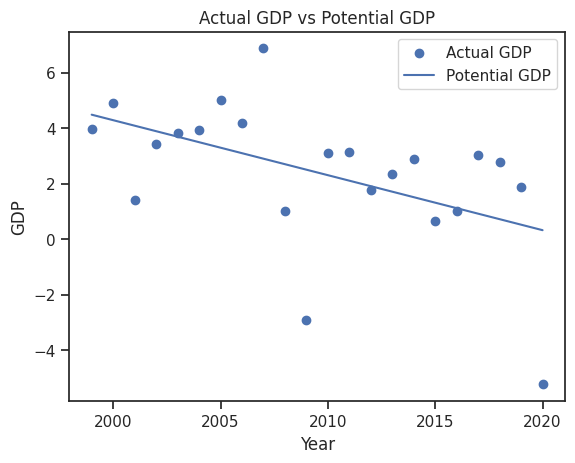

In [75]:
#Finding the Potential GDP

Canada_y_data = data_GDP.loc[data_GDP['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]
Canada_x_data = list(range(1999, 2021))

# Fit the linear regression model
model = LinearRegression()
model.fit(np.array(Canada_x_data).reshape(-1, 1), np.array(Canada_y_data).reshape(-1, 1))

# Predict the potential GDP for future years
Canada_all_years = np.array(list(range(1999, 2021))).reshape(-1, 1)
Canada_potential_gdp = model.predict(Canada_all_years)

df_Canada_potential_gdp = pd.DataFrame({'Year': Canada_all_years.flatten(), 'Potential GDP': Canada_potential_gdp.flatten()})

print(df_Canada_potential_gdp)

# Plot the actual GDP and the predicted potential GDP
plt.scatter(Canada_x_data, Canada_y_data, label='Actual GDP')
plt.plot(Canada_all_years, Canada_potential_gdp, label='Potential GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Actual GDP vs Potential GDP')
plt.legend()
plt.show()



    Year  Potential GDP
0   1999       3.632724
1   2000       3.677653
2   2001       3.698280
3   2002       3.694604
4   2003       3.666626
5   2004       3.614344
6   2005       3.537760
7   2006       3.436873
8   2007       3.311683
9   2008       3.162190
10  2009       2.988395
11  2010       2.790296
12  2011       2.567895
13  2012       2.321191
14  2013       2.050184
15  2014       1.754875
16  2015       1.435263
17  2016       1.091347
18  2017       0.723129
19  2018       0.330609
20  2019      -0.086215
21  2020      -0.527341


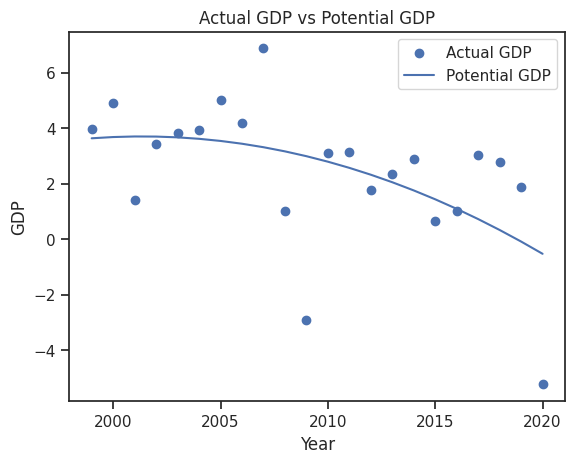

In [78]:
#Finding the Potential GDP

Canada_y_data = data_GDP.loc[data_GDP['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]
Canada_x_data = list(range(1999, 2021))

# Fit the linear regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression()
poly_features = poly.fit_transform(np.array(Canada_x_data).reshape(-1, 1))
model.fit(poly_features, np.array(Canada_y_data).reshape(-1, 1))
y_predicted = model.predict(poly_features)

# Predict the potential GDP for future years
Canada_all_years = np.array(list(range(1999, 2021))).reshape(-1, 1)
# Canada_potential_gdp = model.predict(Canada_all_years)

df_Canada_potential_gdp = pd.DataFrame({'Year': Canada_all_years.flatten(), 'Potential GDP': Canada_potential_gdp.flatten()})

print(df_Canada_potential_gdp)

# Plot the actual GDP and the predicted potential GDP
plt.scatter(Canada_x_data, Canada_y_data, label='Actual GDP')
plt.plot(Canada_all_years, y_predicted, label='Potential GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Actual GDP vs Potential GDP')
plt.legend()
plt.show()

In [79]:
#Finding the Output Gap
# Merge the actual GDP and potential GDP DataFrames on the 'Year' column
merged_Canada_df = pd.merge(pd.DataFrame({'Year': range(1999, 2021), 'Actual GDP': Canada_y_data}),
                     df_Canada_potential_gdp, on='Year', how='outer')

# Calculate the output gap by subtracting the actual GDP from the potential GDP
merged_Canada_df['Output Gap'] = 100 * (merged_Canada_df['Actual GDP'] - merged_Canada_df['Potential GDP']) / merged_Canada_df['Potential GDP']

# Print the merged DataFrame with the output gap
print(merged_Canada_df)



    Year  Actual GDP  Potential GDP   Output Gap
0   1999    3.970483       3.632724     9.297683
1   2000    4.917763       3.677653    33.720131
2   2001    1.405528       3.698280   -61.995102
3   2002    3.422146       3.694604    -7.374487
4   2003    3.811090       3.666626     3.939987
5   2004    3.914029       3.614344     8.291537
6   2005    4.995861       3.537760    41.215378
7   2006    4.165818       3.436873    21.209542
8   2007    6.868609       3.311683   107.405398
9   2008    1.007623       3.162190   -68.135290
10  2009   -2.928400       2.988395  -197.992421
11  2010    3.089495       2.790296    10.722818
12  2011    3.146881       2.567895    22.547115
13  2012    1.762223       2.321191   -24.081111
14  2013    2.329123       2.050184    13.605510
15  2014    2.870036       1.754875    63.546476
16  2015    0.659177       1.435263   -54.072734
17  2016    1.001394       1.091347    -8.242381
18  2017    3.039880       0.723129   320.378408
19  2018    2.777041

In [80]:
x_Canada_Value = merged_Canada_df['Output Gap']
x_Canada_Value

0        9.297683
1       33.720131
2      -61.995102
3       -7.374487
4        3.939987
5        8.291537
6       41.215378
7       21.209542
8      107.405398
9      -68.135290
10    -197.992421
11      10.722818
12      22.547115
13     -24.081111
14      13.605510
15      63.546476
16     -54.072734
17      -8.242381
18     320.378408
19     739.977972
20   -2280.126419
21     892.341303
Name: Output Gap, dtype: float64

<AxesSubplot: ylabel='Output Gap'>

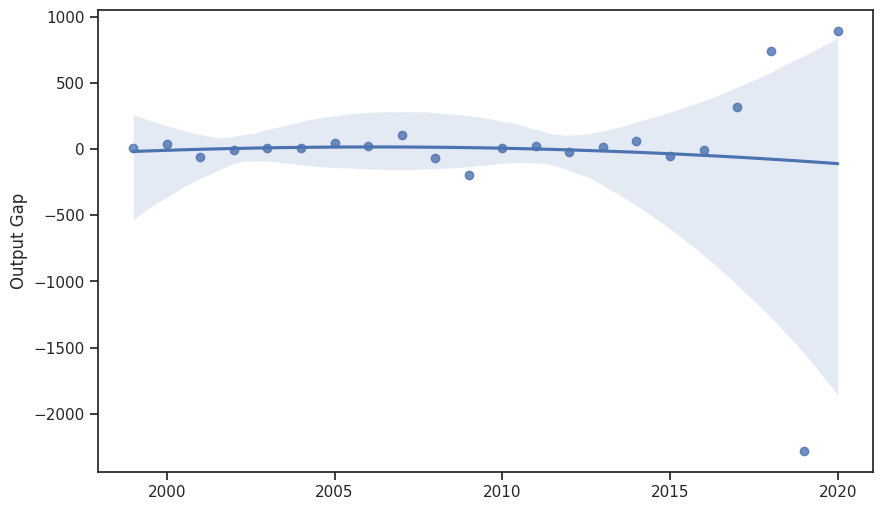

In [82]:
x = merged_Canada_df['Year']
x_new = np.int64(x)

plt.figure(figsize=(10, 6))
sns.regplot(x=x_new, y='Output Gap', data=merged_Canada_df, order= 2)


In [11]:
x_Canada_Value = merged_Canada_df['Output Gap'].values.tolist()
y_Canada_Value = df_unemployment_changes['UnemploymentChange'].values.tolist()

# Convert the data to numpy arrays
x = np.array(x_Canada_Value)
y = np.array(y_Canada_Value)

# Reshape the arrays to match the expected input shape for LinearRegression
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Generate future x-values
x_future = np.linspace(min(x), max(x), 100)  # Extend the x-values by 10 units

# Make predictions for the future x-values
y_pred = model.predict(x_future)

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the linear regression line
plt.plot(x_future, y_pred, color='red', label='Linear Regression')

plt.xlabel('Output Gap')
plt.ylabel('Unemployment Changes')
plt.title("Okun's Law with Linear Regression")
plt.legend()

plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [22, 23]

In [12]:
x = merged_Canada_df['Actual GDP'].values.tolist()
y = df_unemployment_changes['UnemploymentChange'].values.tolist()


# Convert the data to numpy arrays
x = np.array(merged_Canada_df['Actual GDP'])
y = np.array(df_unemployment_changes['UnemploymentChange'])

# Reshape the arrays to match the expected input shape of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Generate predictions using the fitted model
y_pred = model.predict(x)

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', label='Linear Regression')

plt.xlabel('GDP growth')
plt.ylabel('Unemployment Changes')
plt.title("Okun's Law with Linear Regression")
plt.legend()

plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [22, 23]

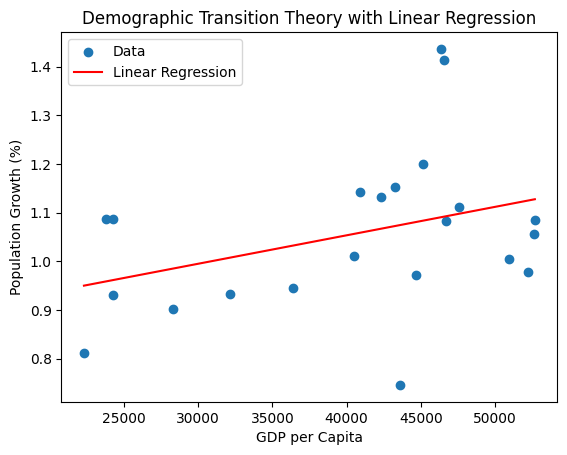

In [7]:
Canada_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]
Canada_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(Canada_x_Demographic)
y = np.array(Canada_y_Population)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot


# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x_plot, y_plot, color='red', label='Linear Regression')


plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title("Demographic Transition Theory with Linear Regression")
plt.legend()

plt.show()


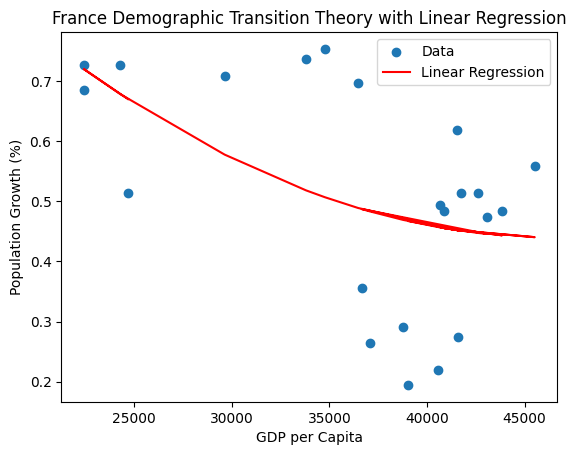

In [8]:
Canada_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]
Canada_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(Canada_x_Demographic)
y = np.array(Canada_y_Population)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Canada_y_Population)
y_predicted = poly_reg_model.predict(poly_features)

# Get the coefficients and intercept
slope = poly_reg_model.coef_[0]
intercept = poly_reg_model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x, y_predicted, color='red', label='Linear Regression')


plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title("Canada Demographic Transition Theory with Linear Regression")
plt.legend()

plt.show()

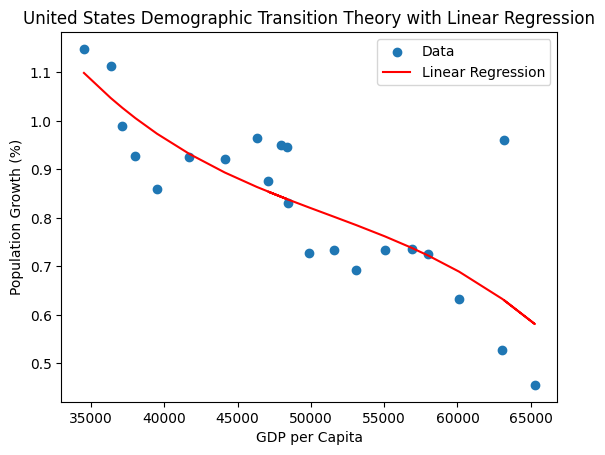

In [9]:
China_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'China', '1999':'2020'].values.tolist()[0]
China_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'China', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(China_x_Demographic)
y = np.array(China_y_Population)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, China_y_Population)
y_predicted = poly_reg_model.predict(poly_features)

# Get the coefficients and intercept
slope = poly_reg_model.coef_[0]
intercept = poly_reg_model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x, y_predicted, color='red', label='Linear Regression')


plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title("China Demographic Transition Theory with Linear Regression")
plt.legend()

plt.show()

In [ ]:
France_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'France', '1999':'2020'].values.tolist()[0]
France_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'France', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(France_x_Demographic)
y = np.array(France_y_Population)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, France_y_Population)
y_predicted = poly_reg_model.predict(poly_features)

# Get the coefficients and intercept
slope = poly_reg_model.coef_[0]
intercept = poly_reg_model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x, y_predicted, color='red', label='Linear Regression')


plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title("France Demographic Transition Theory with Linear Regression")
plt.legend()

plt.show()

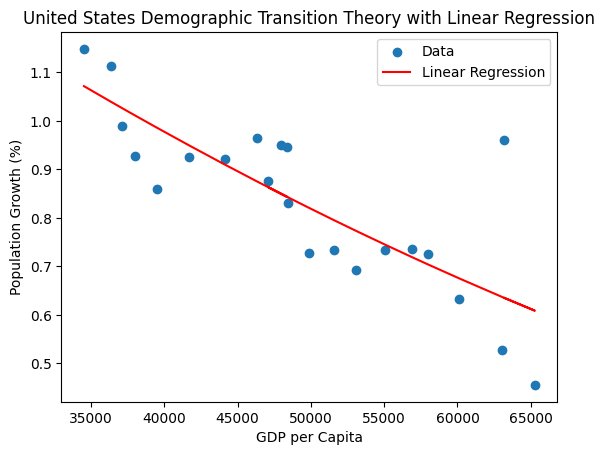

In [12]:
US_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'United States', '1999':'2020'].values.tolist()[0]
US_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'United States', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(US_x_Demographic)
y = np.array(US_y_Population)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, US_y_Population)
y_predicted = poly_reg_model.predict(poly_features)

# Get the coefficients and intercept
slope = poly_reg_model.coef_[0]
intercept = poly_reg_model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x, y_predicted, color='red', label='Linear Regression')


plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title("United States Demographic Transition Theory with Linear Regression")
plt.legend()

plt.show()

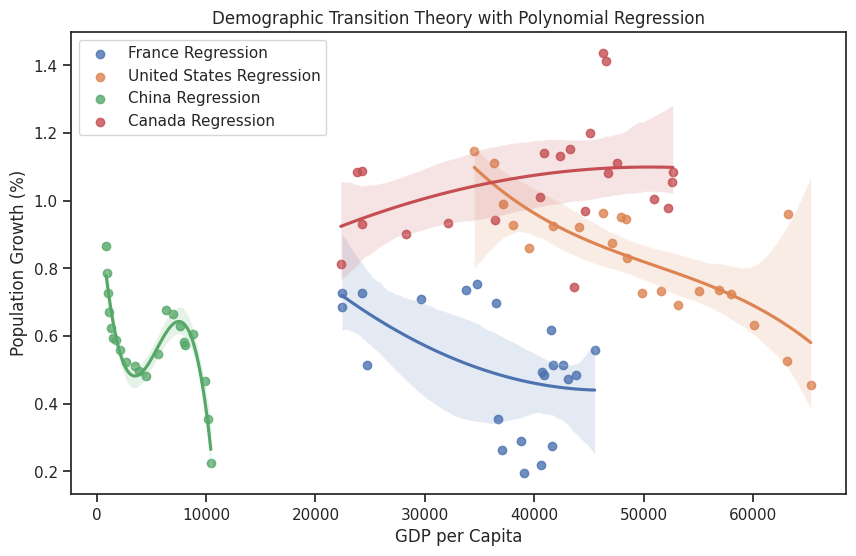

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for France data
France_df = pd.DataFrame({'GDP per Capita': France_x_Demographic, 'Population Growth (%)': France_y_Population})

# Create a DataFrame for United States data
UnitedStates_df = pd.DataFrame({'GDP per Capita': UnitedStates_x_Demographic, 'Population Growth (%)': UnitedStates_y_Population})

# Create a DataFrame for China data
China_df = pd.DataFrame({'GDP per Capita': China_x_Demographic, 'Population Growth (%)': China_y_Population})

# Create a DataFrame for Canada data
Canada_df = pd.DataFrame({'GDP per Capita': Canada_x_Demographic, 'Population Growth (%)': Canada_y_Population})

# Fit polynomial regression and plot the regression lines
plt.figure(figsize=(10, 6))

#sns.scatterplot(x='GDP per Capita', y='Population Growth (%)', data=France_df, label='France Data')
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=France_df, order=2, label='France Regression')

#sns.scatterplot(x='GDP per Capita', y='Population Growth (%)', data=UnitedStates_df, label='United States Data')
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=UnitedStates_df, order=3, label='United States Regression')

#sns.scatterplot(x='GDP per Capita', y='Population Growth (%)', data=China_df, label='China Data')
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=China_df, order=3, label='China Regression')

#sns.scatterplot(x='GDP per Capita', y='Population Growth (%)', data=Canada_df, label='Canada Data')
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=Canada_df, order=2, label='Canada Regression')

plt.xlabel('GDP per Capita')
plt.ylabel('Population Growth (%)')
plt.title('Demographic Transition Theory with Polynomial Regression')
plt.legend()

plt.show()


In [ ]:
x_GDPCapita_data = list(range(1999, 2021))
y_GDPCapita_data = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]

model = LinearRegression().fit(pd.DataFrame(x_GDPCapita_data), y_GDPCapita_data)

# Make a prediction for the year 2030
x_predict = np.array(list(range(2021, 2031))).reshape(-1, 1)
y_predict = model.predict(x_predict)

df_originalGDPperCapita = pd.DataFrame({'Year': list(range(1999, 2021)), 'GDP per Capita (Original)': y_GDPCapita_data})
df_predictedGDPperCapita = pd.DataFrame({'Year': list(range(2021, 2031)), 'GDP per Capita (Predicted)': y_predict})



# Plot the original data and the linear regression line
sns.regplot(x=x_GDPCapita_data, y=y_GDPCapita_data, color='purple')
plt.plot(x_predict, y_predict, 'ro')

plt.show()



In [ ]:
y_PopulationGrowth_data = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'Canada', '1999':'2020'].values.tolist()[0]
x_PopulationGrowth_data = list(range(1999, 2021))

model = LinearRegression().fit(pd.DataFrame(x_PopulationGrowth_data), y_PopulationGrowth_data)

# Make a prediction for the year 2030
x_predict = np.array(list(range(2021, 2031))).reshape(-1, 1)
y_predict = model.predict(x_predict)

df_originalPopulationGrowth = pd.DataFrame({'Year': list(range(1999, 2021)), 'Population Growth (Original)': y_GDPCapita_data})
df_predictedPopulationGrowth = pd.DataFrame({'Year': list(range(2021, 2031)), 'Population Growth (Predicted)': y_predict})

print(df_predictedPopulationGrowth)

# Plot the original data and the linear regression line
sns.regplot(x=x_PopulationGrowth_data, y=y_PopulationGrowth_data, color='purple')
plt.plot(x_predict, y_predict, 'ro')

plt.show()


In [ ]:
x_inflation = df_inflation.loc[df_inflation['Country Name'] == 'United States', '1999':'2020'].values.tolist()[0]
y_wage = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'United States', '1999':'2020'].values.tolist()[0]


# Convert the data to numpy arrays
x = np.array(x_inflation)
y = np.array(y_wage)

# Reshape the arrays to match the expected input of the LinearRegression model
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_wage)
y_predicted = poly_reg_model.predict(poly_features)

# Get the coefficients and intercept
slope = poly_reg_model.coef_[0]
intercept = poly_reg_model.intercept_

# Generate the regression line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = intercept + slope * x_plot

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Plot the regression line
plt.plot(x, y_predicted, color='red', label='Linear Regression')


plt.xlabel('Inflation')
plt.ylabel('Wage')
plt.title("Wage-Spiral: United States")
plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>